In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("new_insurance_data (1) (1).csv")
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [3]:
# EDA
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [4]:
df.dtypes

age                                float64
sex                                 object
bmi                                float64
children                           float64
smoker                              object
Claim_Amount                       float64
past_consultations                 float64
num_of_steps                       float64
Hospital_expenditure               float64
NUmber_of_past_hospitalizations    float64
Anual_Salary                       float64
region                              object
charges                            float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [7]:
df.shape

(1338, 13)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1329.0,3.931001e+01,1.403482e+01,1.800000e+01,2.700000e+01,3.900000e+01,5.100000e+01,6.400000e+01
bmi,1335.0,3.066511e+01,6.101690e+00,1.596000e+01,2.630250e+01,3.040000e+01,3.468750e+01,5.313000e+01
children,1333.0,1.090773e+00,1.201856e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Claim_Amount,1324.0,3.336133e+04,1.561729e+04,1.920136e+03,2.076886e+04,3.370031e+04,4.505233e+04,7.727799e+04
past_consultations,1332.0,1.521622e+01,7.467723e+00,1.000000e+00,9.000000e+00,1.500000e+01,2.000000e+01,4.000000e+01
num_of_steps,1335.0,9.100047e+05,9.188612e+04,6.954300e+05,8.471995e+05,9.143000e+05,9.716840e+05,1.107872e+06
Hospital_expenditure,1334.0,1.584179e+07,2.669305e+07,2.945253e+04,4.077633e+06,7.490337e+06,1.084082e+07,2.616317e+08
NUmber_of_past_hospitalizations,1336.0,1.060629e+00,5.335831e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
Anual_Salary,1332.0,3.696849e+08,5.668843e+08,2.747072e+06,7.701932e+07,1.419361e+08,3.243499e+08,4.117197e+09
charges,1338.0,1.327042e+04,1.211001e+04,1.121874e+03,4.740287e+03,9.382033e+03,1.663991e+04,6.377043e+04


Null value removal using Immputation
* **Mode : for categorical data**
* **Mean/Median : for numerical data**
* **Median : if there are outliers, better to use median**

In [9]:
df = df.dropna()
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

**Outlier**

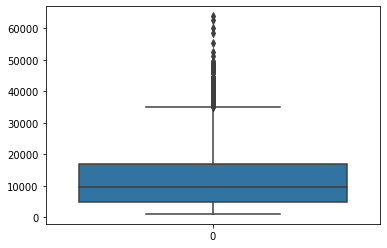

In [10]:
sns.boxplot(df['charges'])

In [11]:
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
print("q1 = ",q1)
print("q3 = ",q3)

q1 =  4842.251225
q3 =  16964.132700000002


In [12]:
IQR = q3 - q1
print(IQR)

12121.881475000002


In [13]:
lb = q1 - 1.5*IQR
ub = q3 + 1.5*IQR
print("lower fence = ",lb)
print("upper fence = ",ub)

lower fence =  -13340.570987500003
upper fence =  35146.954912500005


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1287.0,3.941958e+01,1.405199e+01,1.800000e+01,2.700000e+01,4.000000e+01,5.100000e+01,6.400000e+01
bmi,1287.0,3.065575e+01,6.086323e+00,1.596000e+01,2.622000e+01,3.036000e+01,3.460000e+01,5.313000e+01
children,1287.0,1.094794e+00,1.202782e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Claim_Amount,1287.0,3.349858e+04,1.561172e+04,2.912591e+03,2.090597e+04,3.396877e+04,4.515241e+04,7.727799e+04
past_consultations,1287.0,1.524709e+01,7.457366e+00,1.000000e+00,9.000000e+00,1.500000e+01,2.000000e+01,4.000000e+01
num_of_steps,1287.0,9.113778e+05,9.083364e+04,6.991570e+05,8.489270e+05,9.152840e+05,9.726140e+05,1.107872e+06
Hospital_expenditure,1287.0,1.579929e+07,2.653821e+07,2.945253e+04,4.114357e+06,7.567064e+06,1.093014e+07,2.616317e+08
NUmber_of_past_hospitalizations,1287.0,1.068376e+00,5.290789e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
Anual_Salary,1287.0,3.727972e+08,5.655770e+08,3.150786e+06,7.964523e+07,1.451129e+08,3.337660e+08,4.117197e+09
charges,1287.0,1.336607e+04,1.202582e+04,1.121874e+03,4.842251e+03,9.549565e+03,1.696413e+04,6.377043e+04


**Distributions**

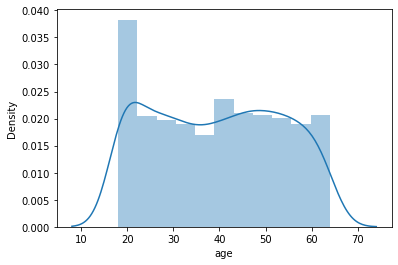

In [15]:
sns.distplot(df['age'])

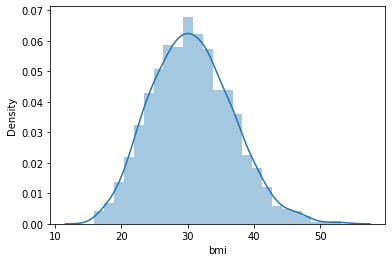

In [16]:
sns.distplot(df['bmi'])               # normal distribution

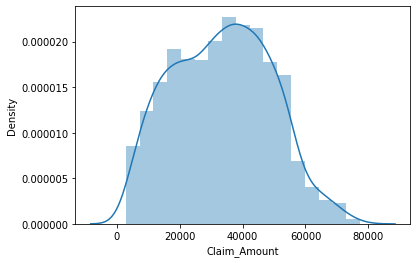

In [17]:
sns.distplot(df['Claim_Amount'])                   # left skewed

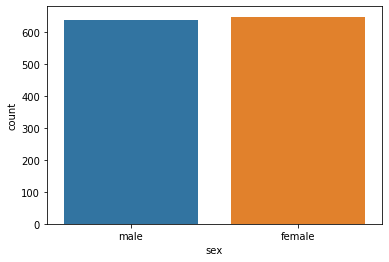

In [18]:
sns.countplot(x=df['sex'])

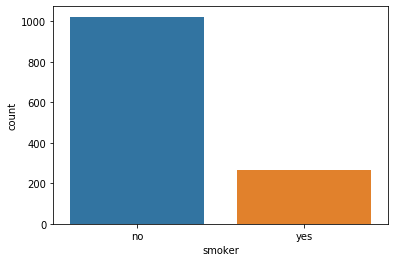

In [19]:
sns.countplot(x=df['smoker'])

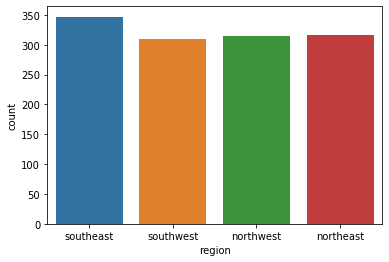

In [20]:
sns.countplot(x=df['region'])

**Encoding - Object Data**

In [21]:
df.dtypes

age                                float64
sex                                 object
bmi                                float64
children                           float64
smoker                              object
Claim_Amount                       float64
past_consultations                 float64
num_of_steps                       float64
Hospital_expenditure               float64
NUmber_of_past_hospitalizations    float64
Anual_Salary                       float64
region                              object
charges                            float64
dtype: object

In [22]:
df['sex'].value_counts()

female    648
male      639
Name: sex, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
df['sex'] = le.fit_transform(df['sex'])

In [26]:
df['sex'].value_counts()

0    648
1    639
Name: sex, dtype: int64

In [27]:
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [28]:
df['smoker'].value_counts()

0    1023
1     264
Name: smoker, dtype: int64

In [29]:
df['region'].value_counts()

2    347
0    316
1    314
3    310
Name: region, dtype: int64

In [30]:
df.dtypes

age                                float64
sex                                  int32
bmi                                float64
children                           float64
smoker                               int32
Claim_Amount                       float64
past_consultations                 float64
num_of_steps                       float64
Hospital_expenditure               float64
NUmber_of_past_hospitalizations    float64
Anual_Salary                       float64
region                               int32
charges                            float64
dtype: object

In [31]:
df.head(2)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,2,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,2,1131.5066


**Splitting the Data : Train & Test**

In [32]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [33]:
x = df.drop(['charges'], axis=1)

In [34]:
x.head(2)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,2
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,2


In [35]:
y = df['charges']

In [36]:
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1333    55135.40209
1334    58571.07448
1335    60021.39897
1336    62592.87309
1337    63770.42801
Name: charges, Length: 1287, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2)

**Model Building**
* **Training the model**
* **Testing the model : by doing predictions**
* **Model Performance : Evaluating the model**

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression() 

In [41]:
# Training the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# Test the model
y_pred = lr.predict(x_test)

In [43]:
# Model Evaluation
from sklearn.metrics import r2_score

In [44]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.9914337855494404


**99% Accurancy --> Overfitting**
* **Scaling the features**
* **Feature Selection**
* **Hyper-parameter tuning**

In [45]:
# Scaling --> Standardization
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()

In [47]:
# scale the input data i.e. model input = x (train and test)
xtrain = sc.fit_transform(x_train)
xtest = sc.fit_transform(x_test)

In [48]:
# Re-traning the model with scaled data
lr.fit(xtrain, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# Re-test the model
ypred = lr.predict(xtest)

In [50]:
# Evaluating the model
r2_score(y_test, ypred)

0.989576389671543